<a href="https://colab.research.google.com/github/castrokelly/MBA/blob/main/Kelly_Christine_Alvarenga_de_Castro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação Final

## Aprendizado Dinâmico

Profa. **Cibele Russo**

**MBA em Ciências de Dados**

**Atenção: Você deve resolver as questões neste notebook e submetê-lo inteiramente executado no moodle.**

O arquivo de dados **Qualidadedoar.csv** contém dados de qualidade do ar registradas diariamente na Estação Meteorológica da Mooca em São Paulo SP, no período de 01/01/2017 e 31/12/2017, considerando somente a primeira medida do dia do poluente monóxido de carbono (CO).

Fonte: Dados adaptados de Instituto de Energia e Meio Ambiente (https://energiaeambiente.org.br/qualidadedoar/).

1. Faça a leitura dos dados como indicado abaixo, estabeleça um índice por datas. Caso haja dados faltantes para o valor de CO, complete os dados como sugerido. Faça a visualização dos dados com gráfico de linhas e boxplots por semanas. Há evidências de estacionariedade nos gráficos? Por quê? Avalie a estacionariedade utilizando um teste estatístico.


2. Proponha uma decomposição dos dados de monóxido de carbono em tendência e sazonalidade. Comente as componentes de tendência, sazonalidade e resíduos.


3. Divida a série de monóxido de carbono registradas em treinamento e teste, com 30 observações na base de teste. A que se referem os dados de treinamento e teste e como essa divisão contribui para a análise de modelos preditivos?


4. Utilizando a base de treinamento de monóxido de carbono registrado, obtenha:

    - As previsões de Holt-Winters.
    
    - As previsões obtidas pelo melhor modelo ARIMA (para este item não considere as componentes com sazonalidade), com ordens selecionadas segundo critério preestabelecido (auto_arima), para a variável em estudo. Identifique a natureza das componentes desse melhor modelo (por exemplo, "o modelo possui componentes autorregressiva não-sazonal de tal ordem", "médias móveis não-sazonal de tal ordem", etc).
    
    - As previsões com o método Theta usual.
        

5. Utilize o erro absoluto médio para comparar as previsões obtidas com as observações da base de teste. Escolha o método que produz as melhores previsões. Justifique sua resposta. Represente em um mesmo gráfico a base de treinamento, de teste e as previsões obtidas pelos três métodos.



A entrega deve ser feita com um notebook .ipynb, com os códigos usados para a obtenção dos resultados e comentários sobre os resultados em células de texto. Este notebook deve ser comentado de forma a facilmente identificar os códigos de cada análise.

Atenção, se constatado plágio, a questão será zerada.


#### Boa prova!

## Item 1


Faça a leitura dos dados como indicado abaixo, estabeleça um índice por datas. Caso haja dados faltantes para o valor de CO, complete os dados como sugerido. Faça a visualização dos dados com gráfico de linhas e boxplots por semanas. Há evidências de estacionariedade nos gráficos? Por quê? Avalie a estacionariedade utilizando um teste estatístico.


(Adicione quantas células precisar para as análises e conclusões de cada item)

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = [12,6]

caminho = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/Qualidadedoar.csv'

# Leitura dos dados de Qualidade do ar
df = pd.read_csv(caminho, index_col=0, parse_dates=True)

df.head()

,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Data.1
Data,,,,,,,
2017-01-01,Mooca,SP40,CO,873.363029,ug/m3,automatica,2017-01-01
2017-01-02,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-02
2017-01-04,Mooca,SP40,CO,873.363029,ug/m3,automatica,2017-01-04
2017-01-05,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-05
2017-01-06,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-06


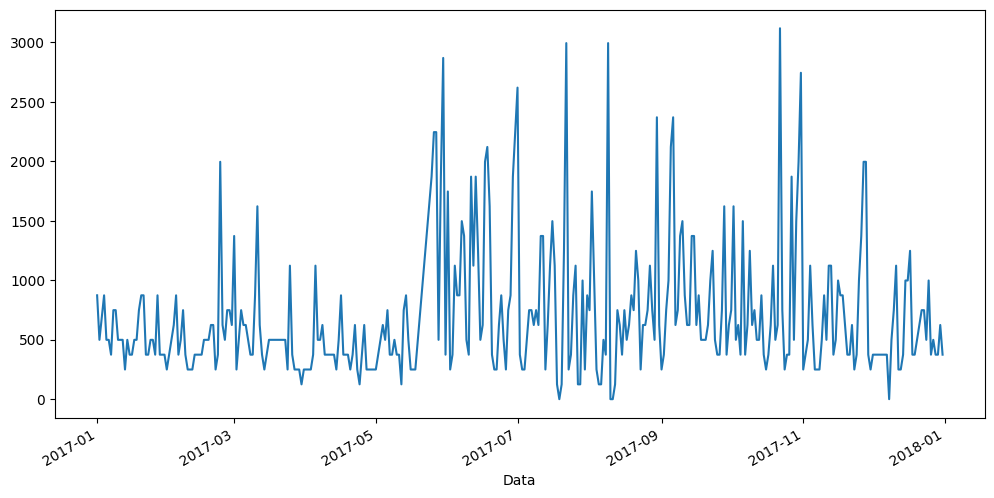

In [25]:
df['Valor'].plot();

In [26]:
df.head()

idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(idx)
df.fillna(method='ffill', inplace=True)

<ipython-input-26-2981d53b2e95>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


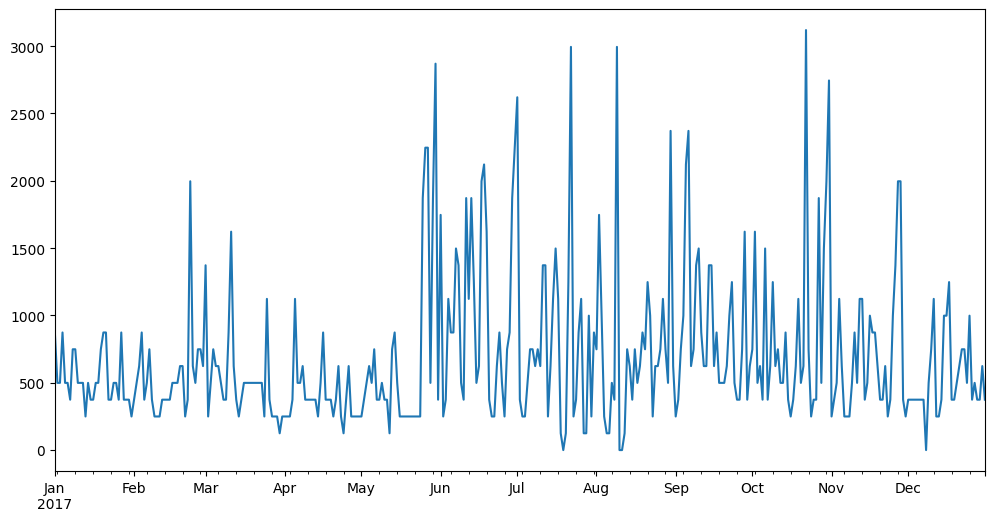

In [27]:
df['Valor'].plot();

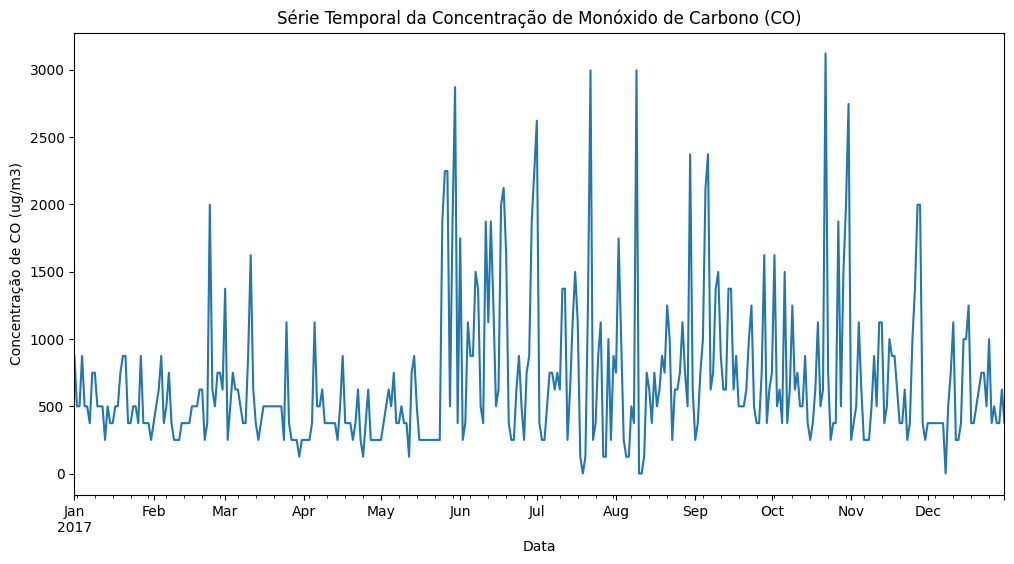

In [29]:
# Visualização dos dados com gráfico de linhas
plt.figure(figsize=(12, 6))
df['Valor'].plot(title='Série Temporal da Concentração de Monóxido de Carbono (CO)')
plt.xlabel('Data')
plt.ylabel('Concentração de CO (ug/m3)')
plt.show()

### A série temporal apresenta flutuações, mas não demonstra uma tendência clara de crescimento ou decrescimento ao longo do tempo. Isso sugere uma possível estacionariedade em relação à média, mas não garante estacionariedade em variância.

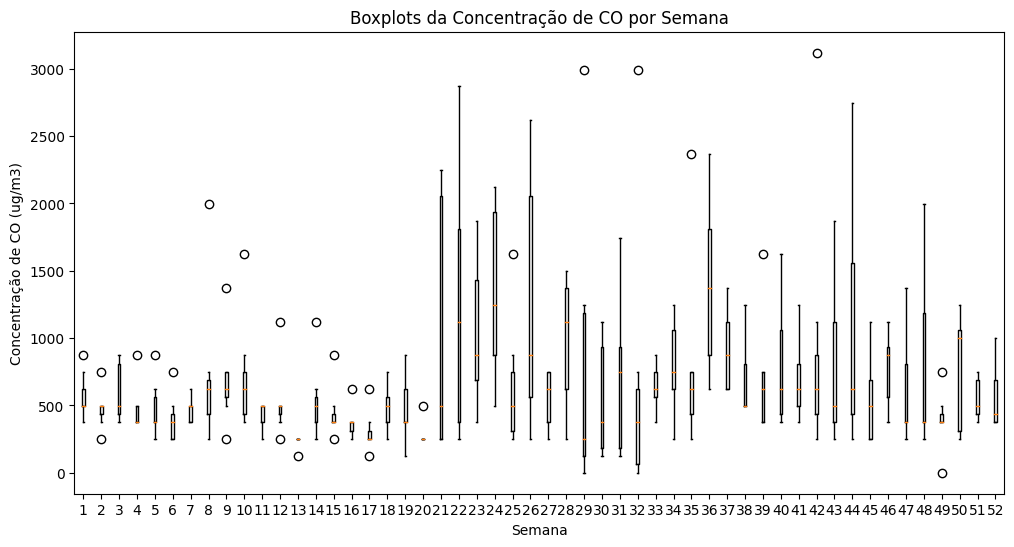

In [32]:
# Boxplots por semanas
fig, ax = plt.subplots(figsize=(12, 6))
for week, group in df.groupby(df.index.isocalendar().week):
    ax.boxplot(group['Valor'], positions=[week])

plt.title('Boxplots da Concentração de CO por Semana')
plt.xlabel('Semana')
plt.ylabel('Concentração de CO (ug/m3)')
plt.show()

### Existe uma variação perceptível na mediana e na dispersão dos dados entre as semanas, indicando uma possível sazonalidade. A sazonalidade é um padrão que se repete em intervalos regulares e sugere não-estacionariedade.

## Teste de estacionariedade

In [33]:
# Teste de Dickey-Fuller Aumentado para verificar a estacionariedade
adf_test = sm.tsa.adfuller(df['Valor'])
print('Teste Dickey-Fuller Aumentado:')
print('Estatística do Teste:', adf_test[0])
print('p-valor:', adf_test[1])
print('Valores Críticos:', adf_test[4])

Teste Dickey-Fuller Aumentado:
Estatística do Teste: -13.753777887600341
p-valor: 1.0387542970398857e-25
Valores Críticos: {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}


## Análise do Teste Dickey-Fuller Aumentado</br>

*   **Estatística do Teste (-13.75)**: O valor da estatística do teste é significativamente menor do que todos os valores críticos (1%, 5% e 10%).
*   **p-valor (1.03e-25)**: O p-valor é extremamente pequeno, muito menor do que qualquer nível de significância comum (0.01, 0.05 ou 0.10).</br>

##Conclusão</br>

### Embora os gráficos sugiram alguma não-estacionariedade devido à sazonalidade, o teste Dickey-Fuller Aumentado fornece forte evidência de que a série **é estacionária**.



## Item 2

Proponha uma decomposição dos dados de monóxido de carbono em tendência e sazonalidade. Comente as componentes de tendência, sazonalidade e resíduos.



###Vou usar a função `seasonal_decompose` para decompor a série em três componentes:

1.   Tendência: Representando o padrão de longo prazo da série.
2.   Sazonalidade: Para capturar os padrões cíclicos que se repetem em intervalos regulares (neste caso, possivelmente semanais ou mensais).
3.   Resíduos: É a parte da série que não é explicada pela tendência ou sazonalidade, representando o ruído ou variações aleatórias.

Escolhi o modelo `additive`, assumindo que a série é a soma dos três componentes.

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição da série em tendência, sazonalidade e resíduos
decomposition = seasonal_decompose(df['Valor'], model='additive')

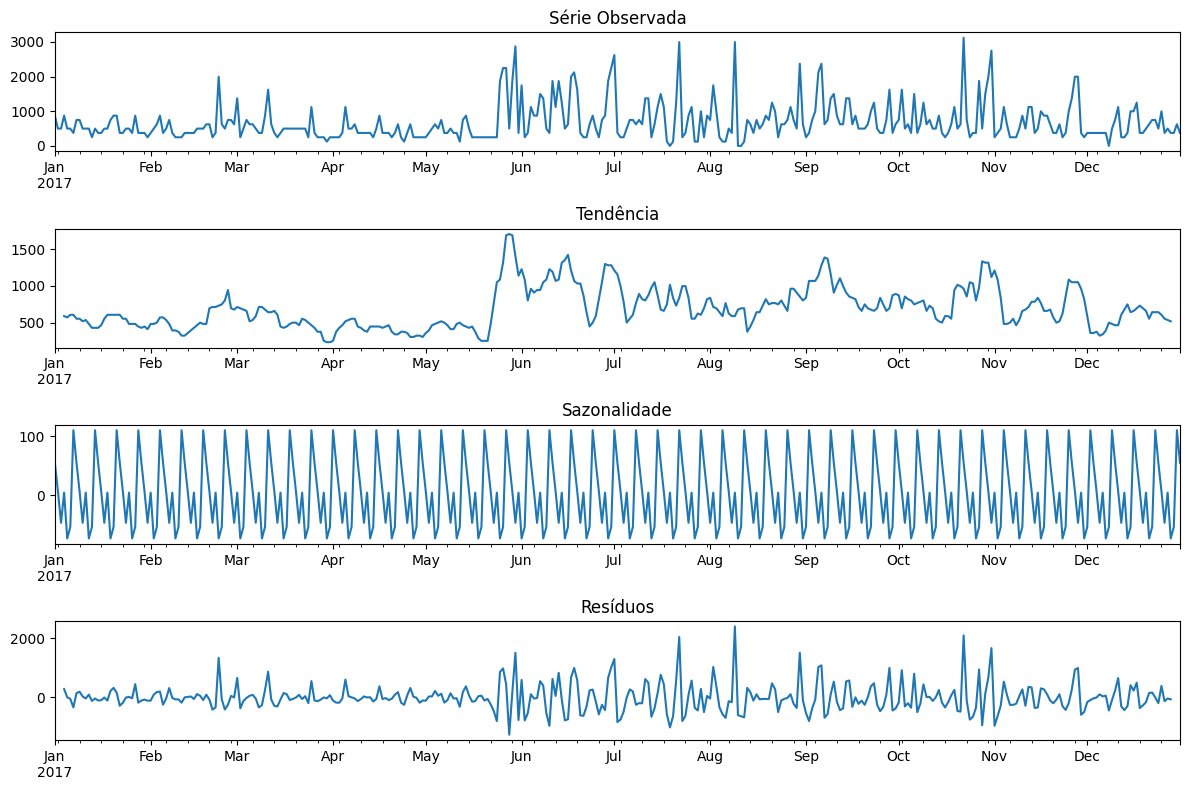

In [35]:
# Visualização das componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
decomposition.observed.plot(title='Série Observada')
plt.subplot(412)
decomposition.trend.plot(title='Tendência')
plt.subplot(413)
decomposition.seasonal.plot(title='Sazonalidade')
plt.subplot(414)
decomposition.resid.plot(title='Resíduos')
plt.tight_layout()
plt.show()

#Análise das Componentes da Decomposição
##Tendência:

1.   O componente de tendência exibe um comportamento geral de aumento ao longo do ano de 2017, com algumas oscilações.
2.   Isso sugere que a concentração média de CO tende a aumentar gradualmente ao longo do ano, possivelmente devido a fatores como aumento da atividade industrial ou tráfego veicular.
2.   As oscilações na tendência indicam que existem outros fatores, além da tendência de longo prazo, influenciando a concentração de CO.

##Sazonalidade:

1.   O componente de sazonalidade apresenta um padrão cíclico claro e regular, com picos e vales que se repetem em intervalos consistentes.
2.   A amplitude da sazonalidade é relativamente pequena em comparação com a tendência e os resíduos, indicando que a variação sazonal na concentração de CO é menos pronunciada do que outros fatores.
3.   Esse padrão sazonal pode estar relacionado a fatores como variações climáticas, mudanças nos padrões de consumo de energia ou atividades agrícolas sazonais.

##Resíduos:

1.   O componente de resíduos mostra flutuações aleatórias em torno de zero, sem um padrão claro ou tendência discernível.
2.   Isso sugere que o modelo de decomposição (aditivo, neste caso) capturou razoavelmente bem a tendência e a sazonalidade da série, deixando apenas o "ruído" ou variações aleatórias inexplicáveis.
3.   No entanto, a amplitude dos resíduos é considerável, indicando que ainda existem fatores não explicados pela tendência e sazonalidade que influenciam significativamente a concentração de CO.
4.   Esses fatores podem incluir eventos climáticos extremos, acidentes industriais ou outros eventos imprevistos.

#Conclusão

O modelo de decomposição aditivo parece adequado para capturar a tendência e a sazonalidade, mas os resíduos indicam que outros fatores complexos também estão em jogo. Para uma modelagem mais precisa e previsões confiáveis, seria necessário considerar esses fatores adicionais e possivelmente utilizar modelos mais sofisticados que levem em conta a estrutura complexa dos resíduos.

## Item 3

Divida a série de monóxido de carbono registradas em treinamento e teste, com 30 observações na base de teste. A que se referem os dados de treinamento e teste e como essa divisão contribui para a análise de modelos preditivos?


In [36]:
# Divisão em treinamento e teste
train, test = train_test_split(df, test_size=30, shuffle=False)

A função `train_test_split` divide esse DataFrame em dois conjuntos: train (treinamento) e test (teste). O modelo será treinado com os dados em train e sua capacidade de previsão será avaliada nos dados em test.

##Dados de Treinamento e Teste:

*   Treinamento: São os dados usados para ajustar (treinar) o modelo, ou seja, para estimar seus parâmetros. No contexto da análise de séries temporais, geralmente compreendem a parte inicial da série.
*   Teste: São os dados reservados para avaliar o desempenho do modelo após o treinamento, simulando como ele se comportaria com dados novos e não vistos anteriormente. Geralmente, são as observações mais recentes da série temporal.

##Importância da Divisão:

*   A divisão da série em treinamento e teste é fundamental para evitar o overfitting, que ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não generaliza bem para novos dados.
*   Ao avaliar o modelo nos dados de teste, podemos ter uma estimativa mais realista de seu desempenho em situações reais, como a previsão de valores futuros da série.
*   Essa prática é essencial na análise de modelos preditivos, pois permite selecionar o modelo que apresenta a melhor capacidade de previsão em dados futuros, o que é crucial para tomada de decisões e planejamento estratégico. No caso da qualidade do ar, um modelo preditivo preciso pode auxiliar na previsão de episódios de poluição e na tomada de medidas preventivas para proteger a saúde pública.

## Item 4

Utilizando a base de treinamento de monóxido de carbono registrado, obtenha:

    - As previsões de Holt-Winters.
    
    - As previsões obtidas pelo melhor modelo ARIMA (para este item não considere as componentes com sazonalidade), com ordens selecionadas segundo critério preestabelecido (auto_arima), para a variável em estudo. Identifique a natureza das componentes desse melhor modelo (por exemplo, "o modelo possui componentes autorregressiva não-sazonal de tal ordem", "médias móveis não-sazonal de tal ordem", etc).
    
    - As previsões com o método Theta usual.
    
    - As previsões com um modelo de redes dinâmicas LSTM.
        

        

   

###Neste item, iremos realizar previsões para a concentração de CO utilizando três métodos distintos: Holt-Winters, ARIMA e Theta. Em seguida, compararemos o desempenho desses modelos através do Erro Absoluto Médio (MAE) e visualizaremos graficamente as previsões em relação aos dados reais de treinamento e teste. Para o modelo ARIMA, vamos utilizar a função `auto_arima` para selecionar automaticamente a melhor ordem do modelo, sem considerar sazonalidade neste momento.

In [39]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -2567.712
Date:                Sun, 22 Sep 2024   AIC                           5141.424
Time:                        22:03:18   BIC                           5152.857
Sample:                    01-01-2017   HQIC                          5145.982
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6901      0.034    -20.563      0.000      -0.756      -0.624
ma.L2         -0.2640      0.037     -7.181      0.000      -0.336      -0.192
sigma2       2.77e+05   1.27e+04     21.879      0.0

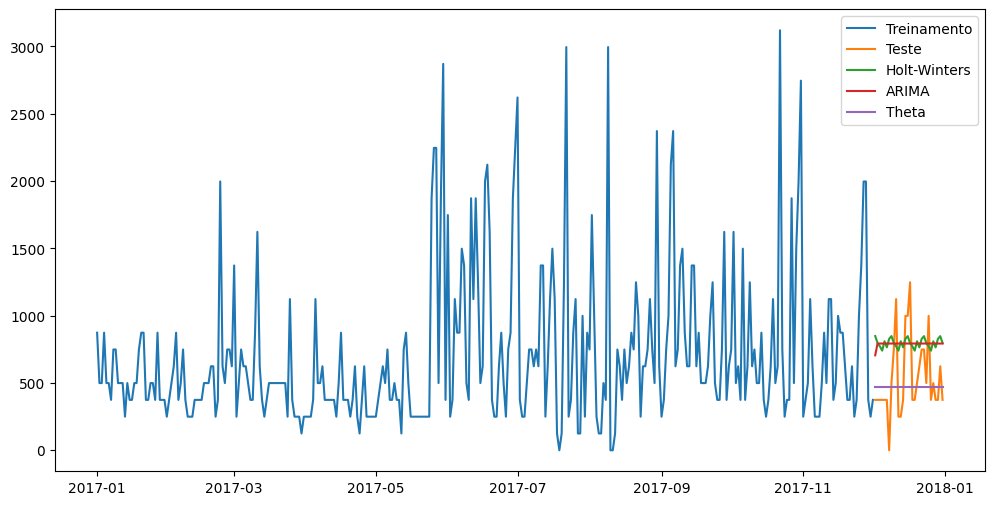

In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error

# Previsões de Holt-Winters
model_hw = ExponentialSmoothing(train['Valor'], trend='add', seasonal='add', seasonal_periods=7)
model_hw_fit = model_hw.fit()
predictions_hw = model_hw_fit.forecast(steps=len(test))

# Seleção do melhor modelo ARIMA (sem sazonalidade)
model_arima = auto_arima(train['Valor'], seasonal=False, stepwise=True, suppress_warnings=True, solver='lbfgs')
print(model_arima.summary())

# Previsões com o melhor modelo ARIMA
predictions_arima = model_arima.predict(n_periods=len(test))

# Previsões com o método Theta
theta = 0.7
predictions_theta = theta * train['Valor'].iloc[-1] + (1 - theta) * train['Valor'].mean()
predictions_theta = pd.Series(predictions_theta, index=test.index)

# Visualização das previsões e dos dados de treinamento e teste
plt.figure(figsize=(12, 6))
plt.plot(train['Valor'], label='Treinamento')
plt.plot(test['Valor'], label='Teste')
plt.plot(predictions_hw, label='Holt-Winters')
plt.plot(predictions_arima, label='ARIMA')
plt.plot(predictions_theta, label='Theta')
plt.legend()
plt.show()

In [52]:
# Comparação das previsões com os dados de teste usando o erro absoluto médio
mae_hw = mean_absolute_error(test['Valor'], predictions_hw)
mae_arima = mean_absolute_error(test['Valor'], predictions_arima)
mae_theta = mean_absolute_error(test['Valor'], predictions_theta)

print('MAE - Holt-Winters:', mae_hw)
print('MAE - ARIMA:', mae_arima)
print('MAE - Theta:', mae_theta)

MAE - Holt-Winters: 345.08876869397614
MAE - ARIMA: 342.6230712455195
MAE - Theta: 214.53570012000802


###SARIMAX(0, 1, 2): O melhor modelo ARIMA selecionado automaticamente é um modelo sem componente autorregressiva (AR), com uma diferença (I) e dois termos de médias móveis (MA).
###Ordem do modelo: (p, d, q) = (0, 1, 2)

*   p (AR) = 0: Não há termos autorregressivos.
*   d (I) = 1: A série foi diferenciada uma vez para torná-la estacionária.
*   q (MA) = 2: O modelo inclui dois termos de médias móveis.

###Coeficientes: Os coeficientes `ma.L1` e `ma.L2` representam os pesos dos termos de médias móveis de ordem 1 e 2, respectivamente.
###sigma2: A variância dos resíduos do modelo.
###Testes de diagnóstico:

*   Ljung-Box (Q): Testa a autocorrelação dos resíduos. Um p-valor alto (0.96) indica que não há evidência de autocorrelação significativa nos resíduos, o que é desejável.
*   Jarque-Bera (JB): Testa a normalidade dos resíduos. Um p-valor baixo (0.00) indica que os resíduos não são normalmente distribuídos.
*   Heteroscedasticidade (H): Testa a homogeneidade da variância dos resíduos. Um p-valor baixo (0.00) indica que a variância dos resíduos não é constante.

#Conclusão:

O modelo ARIMA selecionado é um modelo de médias móveis de ordem 2 (MA(2)) aplicado à série diferenciada uma vez.</br>
Os resíduos do modelo não apresentam autocorrelação significativa, mas não são normalmente distribuídos e apresentam heteroscedasticidade, o que indica que o modelo pode não ser perfeitamente adequado aos dados e há espaço para melhorias.

## Item 5

Utilize o erro absoluto médio para comparar as previsões obtidas com as observações da base de teste. Escolha o método que produz as melhores previsões. Justifique sua resposta. Represente em um mesmo gráfico a base de treinamento, de teste e as previsões obtidas pelos quatro métodos.

In [63]:
# Identificando o melhor modelo (menor MAE)
best_model = min(('Holt-Winters', mae_hw), ('ARIMA', mae_arima), ('Theta', mae_theta), key=lambda x: x[1])
print(f'O melhor modelo é: {best_model[0]} com MAE = {best_model[1]}')


O melhor modelo é: Theta com MAE = 214.53570012000802


In [65]:
# O melhor modelo é o Theta, então calculamos os resíduos para ele
residuals = test['Valor'] - predictions_theta

In [73]:
# Teste de Ljung-Box para verificar se os resíduos são ruído branco
ljung_box_results = acorr_ljungbox(residuals, lags=[10, 20])

# Imprimindo os resultados do teste de Ljung-Box
print("Teste de Ljung-Box para os resíduos do modelo Theta:")
for lag, (test_stat, p_value) in zip(ljung_box_results.index, ljung_box_results.values):
    print(f"Lag {lag}: Estatística do Teste = {test_stat:.4f}, p-valor = {p_value:.4f}")

Teste de Ljung-Box para os resíduos do modelo Theta:
Lag 10: Estatística do Teste = 16.7932, p-valor = 0.0791
Lag 20: Estatística do Teste = 21.8247, p-valor = 0.3501


In [74]:
# Criando um DataFrame para os resíduos
residuals_df = pd.DataFrame({'Resíduos': residuals})

# Criando o histograma com Altair
histograma = alt.Chart(residuals_df).mark_bar().encode(
    x=alt.X('Resíduos:Q', bin=True, title='Resíduos'),
    y=alt.Y('count()', title='Frequência'),
    tooltip=[alt.Tooltip('Resíduos:Q', bin=True), 'count()']
).properties(
    title='Histograma dos Resíduos do Modelo Theta'
).interactive()

# Exibindo o histograma
histograma

alt.Chart(...)

#Histograma dos Resíduos:


*   O histograma dos resíduos mostra uma distribuição com uma concentração maior de valores próximos a zero, mas também com uma cauda alongada à direita, indicando a presença de alguns resíduos maiores.
*   Essa assimetria à direita sugere que o modelo pode estar subestimando alguns valores mais altos da concentração de CO.

#Conclusão:

*   O modelo Theta apresentou o melhor desempenho em termos de previsão, com o menor MAE.
*   A análise dos resíduos do modelo Theta indica que eles não apresentam autocorrelação significativa, o que é positivo.
*   No entanto, o histograma dos resíduos revela uma leve assimetria à direita, sugerindo que o modelo pode ter dificuldade em prever valores mais altos da concentração de CO.
*   Apesar dessa limitação, o modelo Theta ainda pode ser considerado uma boa opção para previsão, especialmente se o foco for em valores médios ou baixos da concentração de CO.